In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
flightsdf = pd.read_csv('flights.csv')

    

canceled_flights = flightsdf[(flightsdf['dep_delay'].isna())&(flightsdf['arr_delay'].isna())]
canceled_flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,1/1/2013 16:00
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,1/1/2013 19:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,1/1/2013 15:00
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,1/1/2013 6:00
1777,2013,1,2,NaN,1540,NaN,NaN,1747,NaN,EV,4352,N10575,EWR,CVG,NaN,569,15,40,1/2/2013 15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,9/30/2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,9/30/2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,9/30/2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,9/30/2013 11:00


In [17]:
def flight_canceled(flightsdfrow):
    if pd.isnull(flightsdfrow['dep_delay']) and pd.isnull(flightsdfrow['arr_delay']):
        return 1
    else:
        return 0
    
flightsdf['canceled_flights'] = flightsdf.apply(flight_canceled, axis=1)
flightsdf['canceled_flights']


0         0
1         0
2         0
3         0
4         0
         ..
336771    1
336772    1
336773    1
336774    1
336775    1
Name: canceled_flights, Length: 336776, dtype: int64

In [18]:
def set_months(month):
    if month ==1:
        return 'January'
    elif month==2:
        return 'February'
    elif month==3:
        return 'March'
    elif month==4:
        return 'April'
    elif month==5:
        return 'May'
    elif month==6:
        return 'June'
    elif month==7:
        return 'July'
    elif month==8:
        return 'August'
    elif month==9:
        return 'September'
    elif month==10:
        return 'October'
    elif month==11:
        return 'November'
    elif month==12:
        return 'December'
    
order_month = ['January', 'February', 'March', 'April',
              'May', 'June', 'July', 'August',
              'September', 'October', 'November', 'December']
flightsdf['month_named'] = pd.Categorical(flightsdf['month'].apply(set_months), categories=order_month, ordered=True)    
    

Text(0, 0.5, 'Canceled Flights(%)')

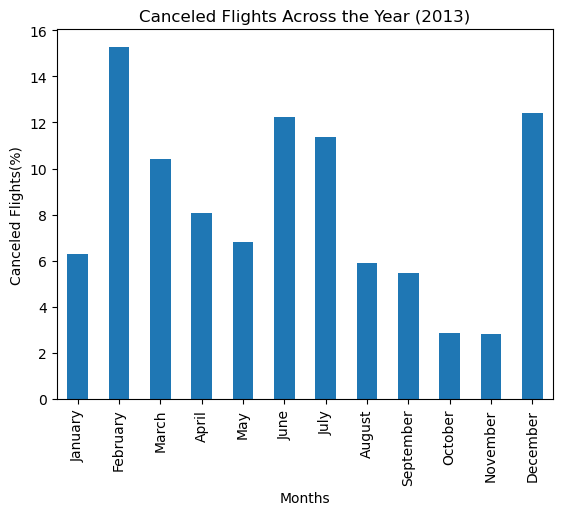

In [19]:
month_cancel = flightsdf.groupby('month_named')['canceled_flights'].sum()
month_filed = flightsdf['canceled_flights'].sum()

canceled_graph = (month_cancel / month_filed) * 100

canceled_graph.plot(kind='bar')
plt.title('Canceled Flights Across the Year (2013)')
plt.xlabel('Months')
plt.ylabel('Canceled Flights(%)')

In [20]:
daysinthemonth = flightsdf.groupby('month')['day'].nunique()
daysinthemonth

month
1     31
2     28
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: day, dtype: int64

In [21]:
flightsdf['time_hour'] = pd.to_datetime(flightsdf['time_hour'])
flightsdf['daysinyear'] = flightsdf['time_hour'].dt.dayofyear


In [22]:
avg_distance_per_daydf = flightsdf.groupby('daysinyear')['distance'].mean()


avg_distance_per_daydf

#avg_distance_per_daydf.min()

daysinyear
1      1077.429929
2      1053.117709
3      1037.370897
4      1032.475410
5      1067.591667
          ...     
361    1087.254413
362    1122.647420
363    1108.057432
364    1098.241736
365    1127.920103
Name: distance, Length: 365, dtype: float64

In [23]:
std_distance_per_daydf = flightsdf.groupby('daysinyear')['distance'].std()
std_distance_per_daydf


daysinyear
1      727.731560
2      721.724020
3      714.950035
4      715.688494
5      741.447822
          ...    
361    722.076403
362    715.691033
363    728.780306
364    723.878785
365    731.355356
Name: distance, Length: 365, dtype: float64

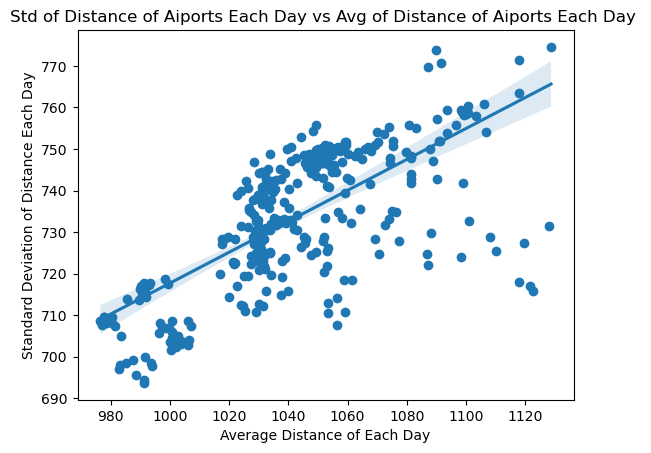

In [25]:
x=avg_distance_per_daydf
y=std_distance_per_daydf 
plt.scatter(x, y)
sns.regplot(x=x, y=y, scatter=False)
plt.title('Std of Distance of Aiports Each Day vs Avg of Distance of Aiports Each Day ')
plt.xlabel('Average Distance of Each Day')
plt.ylabel('Standard Deviation of Distance Each Day')

#plt.xlim(0, 1200)
#plt.ylim(0, 1000)
plt.show()